<a href="https://colab.research.google.com/github/julopezrio/TAM/blob/main/TareaTAM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
N = 1000 # # samples
P = 20 # # features
X, y = make_regression(n_samples=N, n_features=P,
                       noise=1, random_state=42)
print(X.shape,y.shape)

(1000, 20) (1000,)


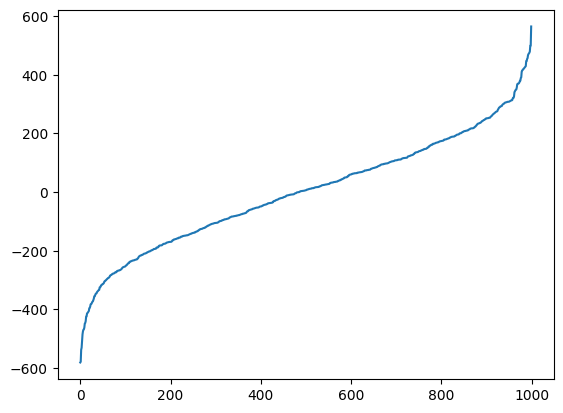

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

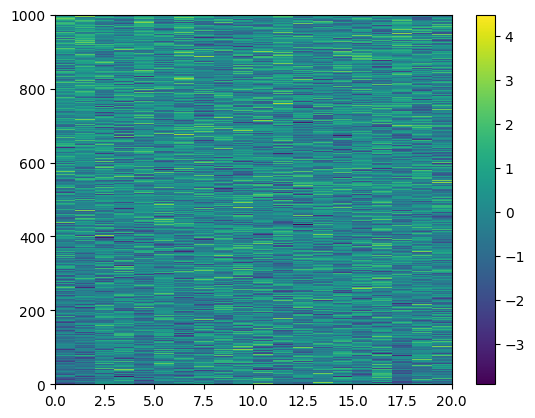

In [3]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

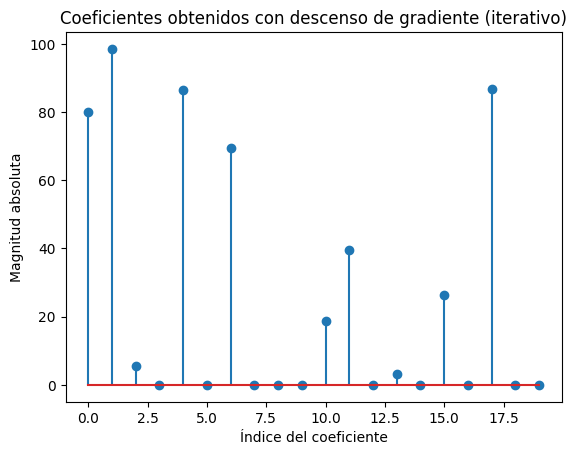

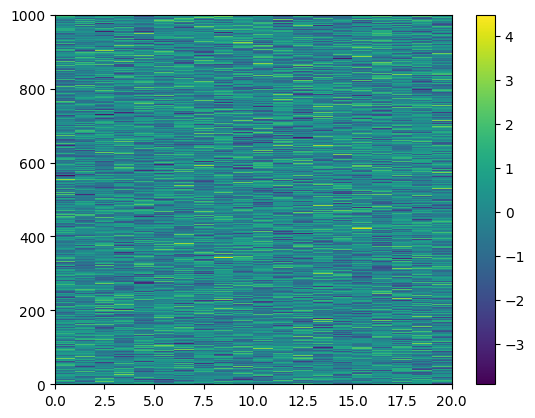

In [5]:
# --- Solución iterativa: Descenso de gradiente batch ---
def grad_desc_reg(X, y, lam_=1e-3, alpha=0.01, max_iter=5000):
    """
    Implementa regresión ridge usando descenso de gradiente batch.
    X: matriz de características (N x P)
    y: vector de salida (N,)
    lam_: parámetro de regularización
    alpha: tasa de aprendizaje
    max_iter: número de iteraciones
    """
    m, n = X.shape
    theta = np.zeros(n)   # Inicialización en ceros

    for _ in range(max_iter):
        grad = (1/m) * (X.T @ (X @ theta - y)) + lam_ * theta
        theta -= alpha * grad
    return theta

# --- Ejecutar la solución iterativa ---
alpha_iterativa = grad_desc_reg(X, y, lam_=1e-3, alpha=0.01, max_iter=5000)

# --- Visualización de los coeficientes obtenidos ---
plt.stem(np.arange(len(alpha_iterativa)), np.abs(alpha_iterativa))
plt.title("Coeficientes obtenidos con descenso de gradiente (iterativo)")
plt.xlabel("Índice del coeficiente")
plt.ylabel("Magnitud absoluta")
plt.show()

plt.pcolormesh(X)
plt.colorbar()
plt.show()


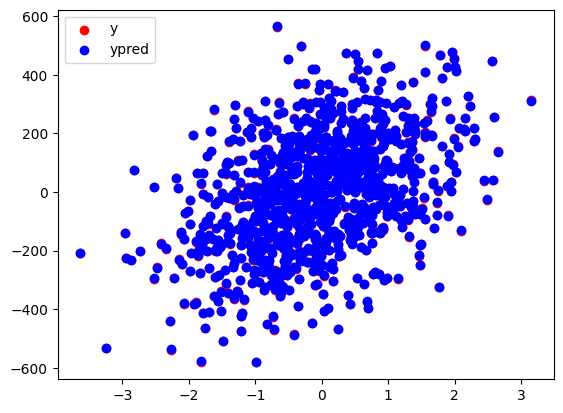

In [6]:
ypred = X.dot(alpha_iterativa)
plt.scatter(X[ind_,0],y[ind_],c='r',marker='o',label='y')
plt.scatter(X[ind_,0],ypred[ind_],c='b',label='ypred')
plt.legend()
plt.show()


In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


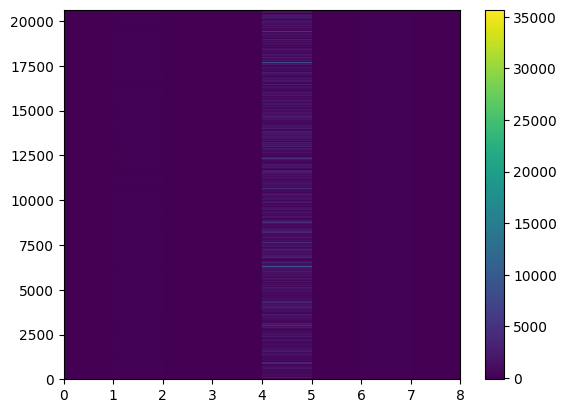

In [8]:
X = housing.data
y = housing.target
print(X.shape,y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

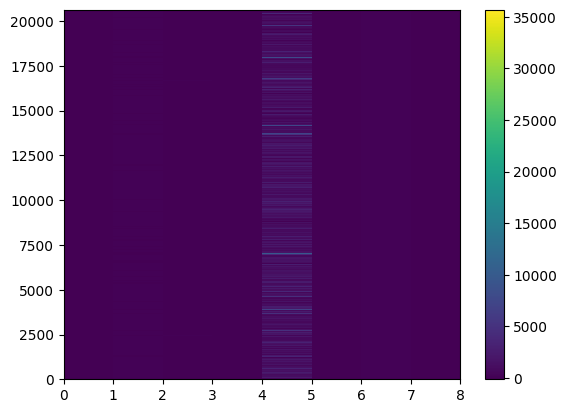

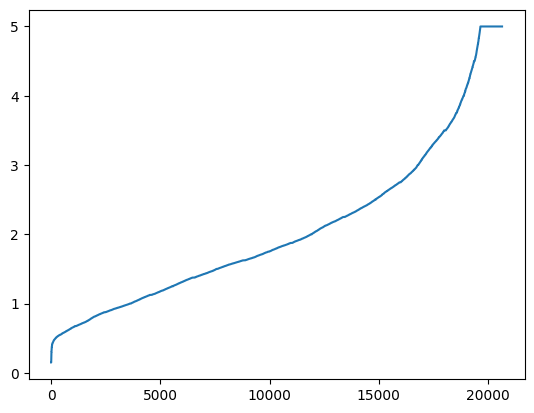

In [9]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()
plt.plot(y[ind_])
plt.show()

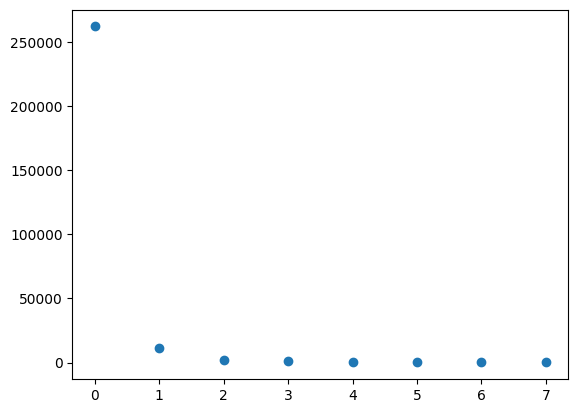

In [10]:
U,S,Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)),S)
plt.show()